In [1]:
import ssms
from ssms.basic_simulators import simulator
import os

# print(list(ssms.config.model_config.keys())[:10])
# print(ssms.config.model_config['ddm'])

sim_out = simulator.simulator(model='ulrich',
                              theta={'v': 0,
                                     'a': 1,
                                     'z': 0.5,
                                     't': 0.5}
                              ,
                              n_samples=10,
                              no_noise=False)

print(sim_out['metadata']['trajectory'])

Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000022958DB3F40>, 'boundary_multiplicative': True}
[[ 0.0000000e+00]
 [ 3.3327386e-02]
 [ 3.8286489e-02]
 ...
 [-9.9900000e+02]
 [-9.9900000e+02]
 [-9.9900000e+02]]


In [2]:
print(sim_out['choices'])

[[-1]
 [ 1]
 [-1]
 [ 1]
 [-1]]


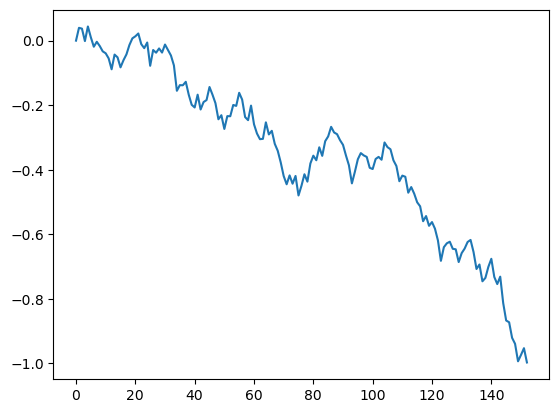

In [11]:
import matplotlib.pyplot as plt 
filt_value = [value for value in sim_out['metadata']['trajectory'] if -1 < value[0] < 1] #save it in a list 
# for value in sim_out['metadata']['trajectory']: 
#     print(value[0])
plt.plot(filt_value)


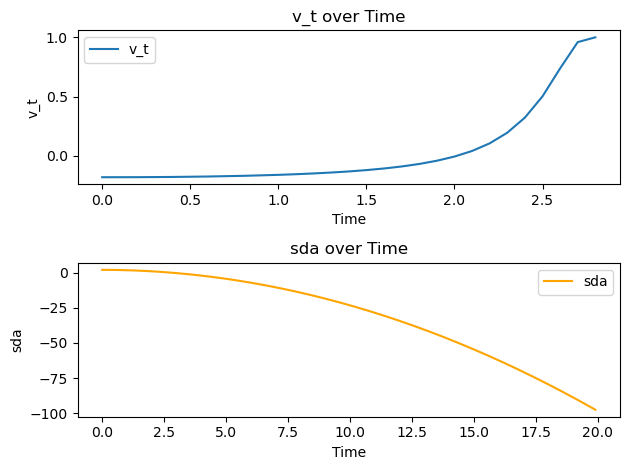

In [10]:
import drift_functions as df 
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 20, 0.1)
p_outer = -0.3
p_inner = -0.7
p_target = 1
r = 0.05
sda_initial = 1.976


v_t_list = []
sda_list = []


for time in t:
    v_t, sda_initial = df.attend_drift(t=time, p_outer=p_outer, p_inner=p_inner, p_target=p_target, r=r, sda=sda_initial)
    v_t_list.append(v_t)
    sda_list.append(sda_initial)

v_t_array = np.array(v_t_list)
sda_array = np.array(sda_list)





plt.subplot(2, 1, 1)
plt.plot(t, v_t_array, label='v_t')
plt.xlabel('Time')
plt.ylabel('v_t')
plt.title('v_t over Time')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(t, sda_array, label='sda', color='orange')
plt.xlabel('Time')
plt.ylabel('sda')
plt.title('sda over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
import ssms
from ssms.basic_simulators import simulator
sim_out2 = simulator.simulator(model='shrink_spot',
                              theta={'v': 0,
                                     'a': 1,
                                     'z': 0.5,
                                     't': 0.5}
                              ,
                              n_samples=10,
                              no_noise=False)

print(sim_out2)

Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x000002594B5CA290>, 'boundary_multiplicative': True}
[nan nan nan ... nan nan nan]
{'rts': array([[0.50057894],
       [0.5006002 ],
       [0.5013627 ],
       [0.50059724],
       [0.50082636],
       [0.5013449 ],
       [0.5006584 ],
       [0.5011502 ],
       [0.5007592 ],
       [0.50103486]], dtype=float32), 'choices': array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32), 'metadata': {'v': array([0.], dtype=float32), 'a': array([1.], dtype=float32), 'z': array([0.5], dtype=float32), 't': array([0.5], dtype=float32), 'deadline': array([999.], dtype=float32), 's': 1.0, 'delta_t': 0.0010000000474974513, 'max_t': 20.0, 'n_samples': 10, 'n_trials': 1, 'simulator': 'ddm_attend', 'boundary_fun_type': 'constant', 'drift_fun_type': 'constant', 'possible_choices': [-1, 1], 'trajectory': array([[   0.],
       [  nan],
       [-999.